# KNN Algorithm for Breast Cancer Detection

**Problem Statement:** Detect whether the tumor is benign or malignant based on the cell nuclei data

**Attributes of the dataset**
   1. Sample code number            id number
   2. Clump Thickness               1 - 10
   3. Uniformity of Cell Size       1 - 10
   4. Uniformity of Cell Shape      1 - 10
   5. Marginal Adhesion             1 - 10
   6. Single Epithelial Cell Size   1 - 10
   7. Bare Nuclei                   1 - 10
   8. Bland Chromatin               1 - 10
   9. Normal Nucleoli               1 - 10
   10. Mitoses                      1 - 10
   11. Class:                       (2 for benign, 4 for malignant)

In [1]:
# Import all the requisite libraries

import numpy as np
import pandas as pd
import matplotlib.pylab as plt

from sklearn.model_selection import train_test_split
from sklearn import neighbors

In [2]:
pwd

'/Users/sylvia/Desktop/IITR/M5_ML/Times_Videos'

In [3]:
# Read dataset
df = pd.read_csv('/Users/sylvia/Desktop/datasets/breast-cancer-wisconsin.csv', header= 0)

In [4]:
# Preview the data
df.head()

,id,clump_thickness,unif_cell_size,unif_cell_shape,marg_adhesion,single_epith_cell_size,bare_nuclei,bland_chromation,normal_nucleoli,mitoses,class
0,1000025,5,1,1,1,2,1,3,1,1,2
1,1002945,5,4,4,5,7,10,3,2,1,2
2,1015425,3,1,1,1,2,2,3,1,1,2
3,1016277,6,8,8,1,3,4,3,7,1,2
4,1017023,4,1,1,3,2,1,3,1,1,2


In [5]:
# Check information about the data

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 699 entries, 0 to 698
Data columns (total 11 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   id                      699 non-null    int64 
 1   clump_thickness         699 non-null    int64 
 2   unif_cell_size          699 non-null    int64 
 3   unif_cell_shape         699 non-null    int64 
 4   marg_adhesion           699 non-null    int64 
 5   single_epith_cell_size  699 non-null    int64 
 6   bare_nuclei             699 non-null    object
 7   bland_chromation        699 non-null    int64 
 8   normal_nucleoli         699 non-null    int64 
 9   mitoses                 699 non-null    int64 
 10  class                   699 non-null    int64 
dtypes: int64(10), object(1)
memory usage: 60.2+ KB


**Rows, Columns, Missing values and Data Types**

- No of samples/rows = 699
- No of features/columns = 11 including class column
- No missing values, all columns have 699 entries.
- bare_nuclei is detected as object data type. In dataset the values for this feature appear to be all numerical.Hence need to investigate this feature further.

**Diagnostics on bare_nuclei since it is detected as an object data type although it has numerical values in it**

Pandas detected bare_nuclei as object data type hence there r some possibilities that there are some missing values in this feature. These missing values might be in some other format rather than nan values.

We observe that applying sum operation on bare_nuclei column returns a string as it is within ''. There are ? here in this string. With missing values which looks for nan we can't detect this because all missing values have been given as a ? here.

In [6]:
# Diagnostics on object type
# We try to sum on this column, if there r some missing values or if missing values
# have been replaced by some characters we will be able to find that.

print(df.clump_thickness.sum(),'\n')  # all numerical values in this column, get a sum

print(df.bare_nuclei.sum())  # not all numerical values in this column

3088 

1102411010111113391111011071?17111111511111107?31011191183458856110232821211091121104211311112948101111111111610551313101019291083521032121010711011011110112111?11551?821101105311011?1010113?210111111101010111101111010181081810111171111010111105111108110105114111058101105110781101?1029102115121091?1101010810111810101010311010411011041?1117111010101010151011?10?105?110411011010113511111?1081510?11011101410811101011011101011110111181131011310471010331110101111111111111101111101121101111111191141111211?4110310121310111101211111181011111043211111101111016103111511141010111111111111011510131103411011051111111111154111111101011110115101111111011111111121111110115111511111111111101310510101121111111010111101311101011011111111110811101102101111?111211146511111311121111111111214111111110111111111158111111111101011111111151121345


### Handle missing values

We replace all ? with nan and check the number of missing values. We then drop the nan values from our dataset since these r not very high in number, 16 values in a dataset of 699 values.

Inorder to apply method df.dropna, we need to replace with np.nan else will have to drop individually while with df.dropna all values can be dropped at once.

In [7]:
df.bare_nuclei.replace('?',np.nan,inplace=True)
df.isna().sum()


id                         0
clump_thickness            0
unif_cell_size             0
unif_cell_shape            0
marg_adhesion              0
single_epith_cell_size     0
bare_nuclei               16
bland_chromation           0
normal_nucleoli            0
mitoses                    0
class                      0
dtype: int64

In [8]:
# Drop na
df.dropna(inplace=True)
df.shape

(683, 11)

### Feature Selection

id column is just a label for the sample and does not add any information to our algorithm/model. Hence we can remove this from dataset.

In [9]:
#Dropping the id attribute

df.drop(columns='id',inplace=True)


**Split dataset into Features column and label column**

In [10]:
#define our features (X) and labels (y):

#X = df.drop(columns = 'class').copy()
X = df.drop(columns = 'class')

y = df['class']


In [11]:
X.head()

,clump_thickness,unif_cell_size,unif_cell_shape,marg_adhesion,single_epith_cell_size,bare_nuclei,bland_chromation,normal_nucleoli,mitoses
0,5,1,1,1,2,1,3,1,1
1,5,4,4,5,7,10,3,2,1
2,3,1,1,1,2,2,3,1,1
3,6,8,8,1,3,4,3,7,1
4,4,1,1,3,2,1,3,1,1


In [12]:
y.head()

0    2
1    2
2    2
3    2
4    2
Name: class, dtype: int64

In [13]:
#Create the test and train datasets for features and labels

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.25, random_state = 33)

**Modelling**

In [14]:
# Running for a default value of 5 for k in knn
# from sklearn import neighbors

###  Default parameters in KNN

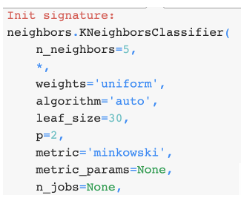

In [15]:
# Create an object for the method
knn = neighbors.KNeighborsClassifier()

# Fit the model
knn.fit(X_train, y_train)


KNeighborsClassifier()

**Metrics Accuracy**

knn.score is another method to calculate accuracy apart from sklearn.metrics -> accuracy, it takes the passed matrix (e.g. X_test), calls predict and calls accuracy_score. 

- y_pred = logr.predict(X_test)
- accuracy_score(y_test, y_pred)
- score(X_test, y_test) function will combine both predict and accuracy, it will predict on X_test & then calculate accuracy using actual labels given, y_test.

In [16]:
# Calculate the accuracy of the model on the test dataset

knn.score(X_test, y_test)


0.9883040935672515

### Finding optimum value of K by checking K values against error. One which gives least error should be picked.


In [17]:
# Try KNN for diffrent k values from 1 to 15

no_neighbors = range(1,15)

training_accuracy = []
test_accuracy = []

for n in no_neighbors:
    knn = neighbors.KNeighborsClassifier(n_neighbors=n)
    knn.fit(X_train, y_train)
    training_accuracy.append(knn.score(X_train, y_train))
    test_accuracy.append(knn.score(X_test, y_test))


In [18]:
training_accuracy

[1.0,
 0.974609375,
 0.97265625,
 0.970703125,
 0.97265625,
 0.970703125,
 0.978515625,
 0.970703125,
 0.97265625,
 0.962890625,
 0.966796875,
 0.962890625,
 0.96484375,
 0.958984375]

In [19]:
test_accuracy

[0.9707602339181286,
 0.9415204678362573,
 0.9883040935672515,
 0.9883040935672515,
 0.9883040935672515,
 1.0,
 0.9941520467836257,
 0.9941520467836257,
 0.9941520467836257,
 0.9824561403508771,
 0.9941520467836257,
 0.9824561403508771,
 0.9941520467836257,
 0.9824561403508771]

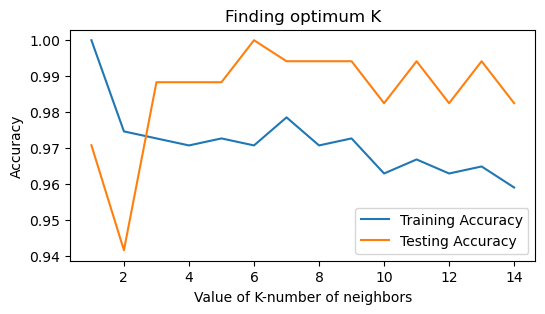

In [20]:
plt.figure(figsize=(6,3))
plt.plot(no_neighbors, training_accuracy,label="Training Accuracy")
plt.plot(no_neighbors, test_accuracy, label = "Testing Accuracy")
plt.xlabel('Value of K-number of neighbors')
plt.ylabel('Accuracy')
plt.title('Finding optimum K')
plt.legend()
plt.plot();

In [21]:
# Index 0 has 1st value so Index 6 will have 7th value i.e. k=7

training_accuracy[6]

0.978515625

In [22]:
test_accuracy[6]

0.9941520467836257